# Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.
Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
cd=pd.read_csv("crime_data.csv")

In [4]:
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
cd.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
cd.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
cd.isnull().sum() # There is no null vaules in my data set 

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
cd.shape # 50 rows and 5 columns 

(50, 5)

In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
df_norm1 = norm_func(cd.iloc[:,1:]) # Normalizing the data
df_norm1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Another method for normalization 

In [11]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(cd.iloc[:,1:]))
data 

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# we do normalize the data to bring all the variables to the same scale by converting all observations in the ranges of 0 to 1 to compute the distance

In [12]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [13]:
type(df_norm1) ## Checking for the type of data after converting the normalization 

pandas.core.frame.DataFrame

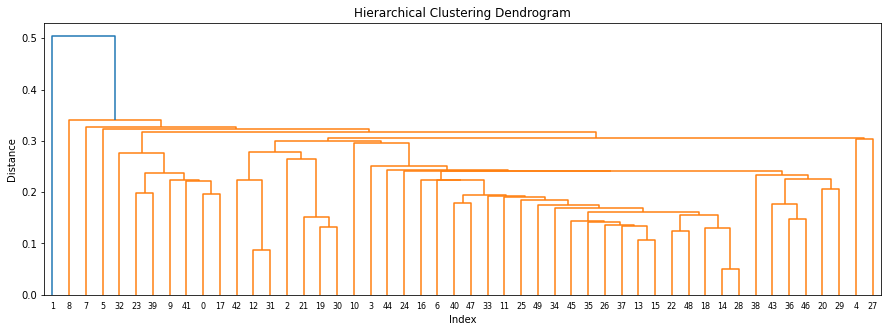

In [14]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="single",metric="euclidean")

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

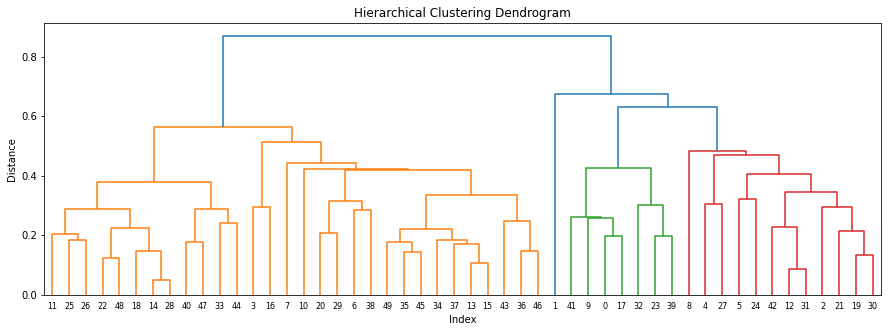

In [15]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="average",metric="euclidean") ## distance between the clusters , method= average 

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

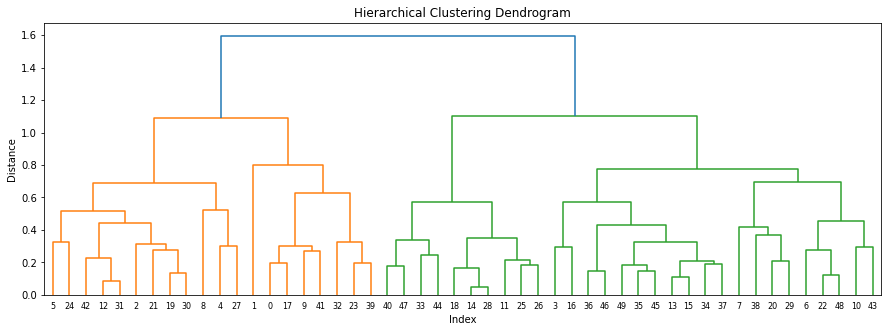

In [16]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="complete",metric="euclidean") ## distance between the clusters , method= complete

plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    
)
plt.show()


In [51]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5,linkage='single',affinity = "euclidean").fit(df_norm1) 


In [52]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm1) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
cd['clust']=cluster_labels # creating a  new column and assigning it to new column 
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [53]:
cd.iloc[:,1:].groupby(cd.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,5.715000,132.300000,70.800000,18.100000,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,3.180000,78.700000,49.300000,11.630000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cd_subset = pd.DataFrame(scaler.fit_transform(cd.iloc[:,1:]))
cd_subset 

,0,1,2,3,4
0,1.255179,0.790787,-0.526195,-0.003451,1.618677
1,0.513019,1.118060,-1.224067,2.509424,2.488933
2,0.072361,1.493817,1.009122,1.053466,-0.121836
3,0.234708,0.233212,-1.084492,-0.186794,-0.992092
4,0.281093,1.275635,1.776781,2.088814,-0.121836
5,0.025976,0.402909,0.869548,1.883901,-0.121836
6,-1.040880,-0.736484,0.799761,-1.092723,-0.992092
7,-0.437875,0.815030,0.450825,-0.585834,-0.992092
8,1.765415,1.990786,1.009122,1.150530,-0.121836
9,2.229265,0.487757,-0.386621,0.492653,1.618677


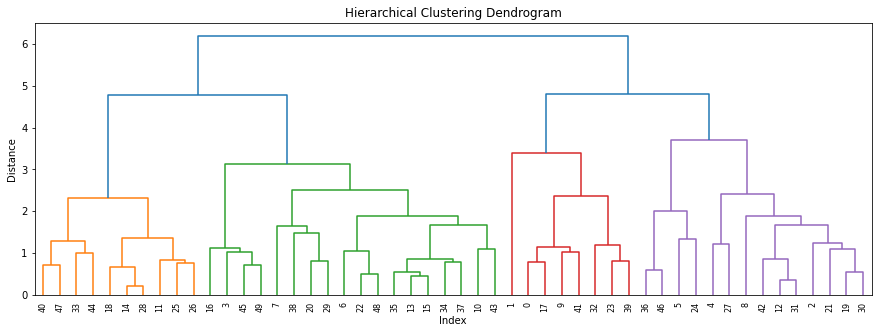

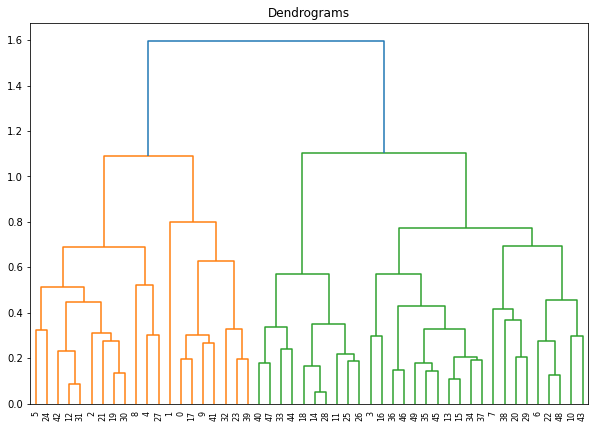

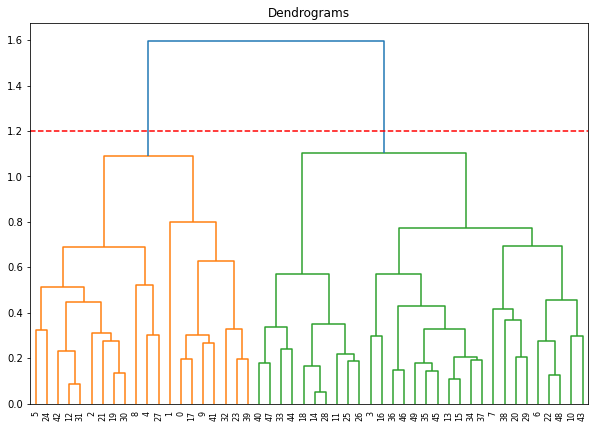

In [55]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm1) # converting into numpy array format 
z = linkage(cd_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm1, method='complete'))
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm1, method='complete'))
plt.axhline(y=1.2, color='r', linestyle='--')
plt.show()

# The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 1.2 and cut the dendrogram

In [56]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(cd_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
cd['clust']=cluster_labels # creating a  new column and assigning it to new column 
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


# You can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4.

# As a final step, let's plot the clusters to see how actually our data has been clustered

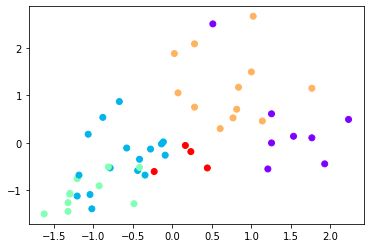

In [80]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(cd_subset)

plt.scatter(x=cd_subset[0], y=cd_subset[3], c=cluster.labels_, cmap='rainbow')

# you can see the data points in the form of five clusters in the above scatter plot

# No of Records in the cluster 1:-

In [58]:
c_0=cd[(cd.clust==0)]
c_0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


# No of Records in the cluster 2:-

In [24]:
c_1=cd[(cd.clust==1)]
c_1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
29,New Jersey,7.4,159,89,18.8,1


# No of Records in the cluster 3:-

In [25]:
c_2=cd[(cd.clust==2)]
c_2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2
31,New York,11.1,254,86,26.1,2
42,Texas,12.7,201,80,25.5,2


# No of Records in the cluster 4:-

In [26]:
c_3=cd[(cd.clust==3)]
c_3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3


# No of Records in the cluster 5 :-

In [27]:
c_4=cd[(cd.clust==4)]

In [28]:
c_4

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
5,Colorado,7.9,204,78,38.7,4
24,Missouri,9.0,178,70,28.2,4
36,Oregon,4.9,159,67,29.3,4
46,Washington,4.0,145,73,26.2,4


# CONCLUSION:-
# here c_0,c_1,c_2,c_3,and c_4 are the five different clusters with different records in it